# Using PCA to discover NFW halo concentration

This notebook demonstrates two applications of PCA using the implementation in scikit-learn. In the first example we'll look at two-dimensional Gaussian random data to visualize the PCA decomposition. In the second example we'll use PCA on a collection of dark matter halo profiles to identify halo concentration as the dominant feature that characterizes the NFW profile. 

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)
try:
    __=plt.style.use('~/aph.mplstyle')
except:
    pass

## Example 1: Gaussian random data

Generate some 2d data with a multivariate Gaussian:

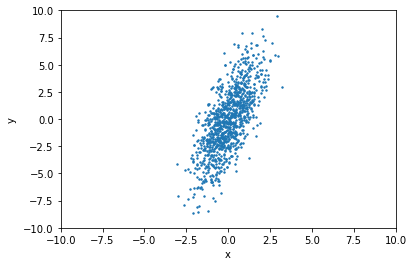

In [1]:
npts = int(1e3)
cov=[[1, 2], [2, 8]]
data = np.random.multivariate_normal(mean=(0, 0), cov=cov, size=npts)
fig, ax = plt.subplots(1, 1)
__=ax.scatter(data[:, 0], data[:, 1], s=2)
xlim = ax.set_xlim(-10, 10)
ylim = ax.set_ylim(-10, 10)
xlabel = ax.set_xlabel(r'${\rm x}$')
ylabel = ax.set_ylabel(r'${\rm y}$')


### Calculate PCA

In [3]:
from sklearn.decomposition import PCA as sklPCA
pca = sklPCA(n_components=data.shape[1])
__=pca.fit(data)

### We get the eigendirections like this

In [4]:
evecs = pca.components_
print("evecs.shape = {0}\n".format(evecs.shape))
print("evecs = {0}\n".format(evecs))

evecs.shape = (2, 2)

evecs = [[ 0.24230788  0.97019941]
 [ 0.97019941 -0.24230788]]



### Visually inspect the two eigenvectors

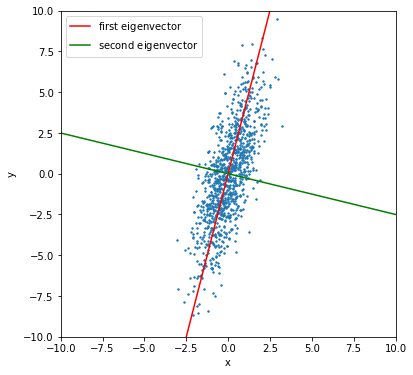

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
__=ax.scatter(data[:, 0], data[:, 1], s=2)

x = np.linspace(-100, 100, 1000)
slope_eigvec1 = evecs[0, 1]/evecs[0, 0]
slope_eigvec2 = evecs[1, 1]/evecs[1, 0]
__=ax.plot(x, slope_eigvec1*x, color='red', label=r'${\rm first\ eigenvector}$')
__=ax.plot(x, slope_eigvec2*x, color='green', label=r'${\rm second\ eigenvector}$')
leg = ax.legend()
xlim = ax.set_xlim(-10, 10)
ylim = ax.set_ylim(-10, 10)
xlabel = ax.set_xlabel(r'${\rm x}$')
ylabel = ax.set_ylabel(r'${\rm y}$')
